<a href="https://colab.research.google.com/github/ShriKant010102/Deep_Learning/blob/main/Notebooks/Chap04/4_2_Clipping_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 4.2 -- Clipping functions

The purpose of this notebook is to understand how a neural network with two hidden layers build more complicated functions by clipping and recombining the representations at the intermediate hidden variables.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions

In [14]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [15]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [16]:
# Define a deep neural network with, one input, one output, two hidden layers and three hidden units (eqns 4.7-4.9)
# To make this easier, we store the parameters in ndarrays, so phi_0 = phi[0] and psi_3,3 = psi[3,3] etc.
def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):

  # TODO -- You write this function
  # Replace the skeleton code below.

  # ANSWER
  # Preactivations at layer 1 (terms in brackets in equation 4.7)

    theta_10 = theta[0, 0]  # Bias for the first neuron in layer 1
    theta_11 = theta[0, 1]  # Weight for the first neuron in layer 1
    theta_20 = theta[1, 0]  # Bias for the second neuron in layer 1
    theta_21 = theta[1, 1]  # Weight for the second neuron in layer 1
    theta_30 = theta[2, 0]  # Bias for the third neuron in layer 1
    theta_31 = theta[2, 1]

    layer1_pre_1 = theta_10 + theta_11 * x ;
    layer1_pre_2 = theta_20 + theta_21 * x ;
    layer1_pre_3 = theta_30 + theta_31 * x ;

  # Activation functions (rest of equation 4.7)
    h1 = activation_fn(layer1_pre_1)
    h2 = activation_fn(layer1_pre_2)
    h3 = activation_fn(layer1_pre_3)

  # Preactivations at layer 2 (terms in brackets in equation 4.8)
    psi_10 = psi[0, 0]  # Bias for the first neuron in layer 2
    psi_11 = psi[0, 1]  # Weight for h1 in layer 2, first neuron
    psi_12 = psi[0, 2]  # Weight for h2 in layer 2, first neuron
    psi_13 = psi[0, 3]  # Weight for h3 in layer 2, first neuron
    psi_20 = psi[1, 0]  # Bias for the second neuron in layer 2
    psi_21 = psi[1, 1]  # Weight for h1 in layer 2, second neuron
    psi_22 = psi[1, 2]  # Weight for h2 in layer 2, second neuron
    psi_23 = psi[1, 3]  # Weight for h3 in layer 2, second neuron
    psi_30 = psi[2, 0]  # Bias for the third neuron in layer 2
    psi_31 = psi[2, 1]  # Weight for h1 in layer 2, third neuron
    psi_32 = psi[2, 2]  # Weight for h2 in layer 2, third neuron
    psi_33 = psi[2, 3]  # Weight for h3 in layer 2, third neuron

  # Preactivations at layer 2 (terms in brackets in equation 4.8)
    layer2_pre_1 = psi_10 + psi_11 * h1 + psi_12 * h2 + psi_13 * h3
    layer2_pre_2 = psi_20 + psi_21 * h1 + psi_22 * h2 + psi_23 * h3
    layer2_pre_3 = psi_30 + psi_31 * h1 + psi_32 * h2 + psi_33 * h3


  # Activation functions (rest of equation 4.8)
    h1_prime = activation_fn(layer2_pre_1)
    h2_prime = activation_fn(layer2_pre_2)
    h3_prime = activation_fn(layer2_pre_3)

    phi_0 = phi[0]  # Bias for the output
    phi_1 = phi[1]  # Weight for h1_prime in the output
    phi_2 = phi[2]  # Weight for h2_prime in the output
    phi_3 = phi[3]  # Weight for h3_prime in the output

  # Weighted outputs by phi (three last terms of equation 4.9)
    phi1_h1_prime = phi_1 * h1_prime
    phi2_h2_prime = phi_2 * h2_prime
    phi3_h3_prime = phi_3 * h3_prime

  # Combine weighted activation and add y offset (summing terms of equation 4.9)
    y = phi_0 + phi1_h1_prime + phi2_h2_prime + phi3_h3_prime ;


  # Return everything we have calculated
    return y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime

In [17]:
# # Plot two layer neural network as in figure 4.5
def plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime):

    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,layer2_pre_1,'r-'); ax[0,0].set_ylabel(r'$\psi_{10}+\psi_{11}h_{1}+\psi_{12}h_{2}+\psi_{13}h_3$')
    ax[0,1].plot(x,layer2_pre_2,'b-'); ax[0,1].set_ylabel(r'$\psi_{20}+\psi_{21}h_{1}+\psi_{22}h_{2}+\psi_{23}h_3$')
    ax[0,2].plot(x,layer2_pre_3,'g-'); ax[0,2].set_ylabel(r'$\psi_{30}+\psi_{31}h_{1}+\psi_{32}h_{2}+\psi_{33}h_3$')
    ax[1,0].plot(x,h1_prime,'r-'); ax[1,0].set_ylabel(r"$h_{1}^{'}$")
    ax[1,1].plot(x,h2_prime,'b-'); ax[1,1].set_ylabel(r"$h_{2}^{'}$")
    ax[1,2].plot(x,h3_prime,'g-'); ax[1,2].set_ylabel(r"$h_{3}^{'}$")
    ax[2,0].plot(x,phi1_h1_prime,'r-'); ax[2,0].set_ylabel(r"$\phi_1 h_{1}^{'}$")
    ax[2,1].plot(x,phi2_h2_prime,'b-'); ax[2,1].set_ylabel(r"$\phi_2 h_{2}^{'}$")
    ax[2,2].plot(x,phi3_h3_prime,'g-'); ax[2,2].set_ylabel(r"$\phi_3 h_{3}^{'}$")

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel(r'Input, $x$');
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel(r'Input, $x$'); ax.set_ylabel(r'Output, $y$')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    plt.show()

Now let's define the parameters and visualize the network

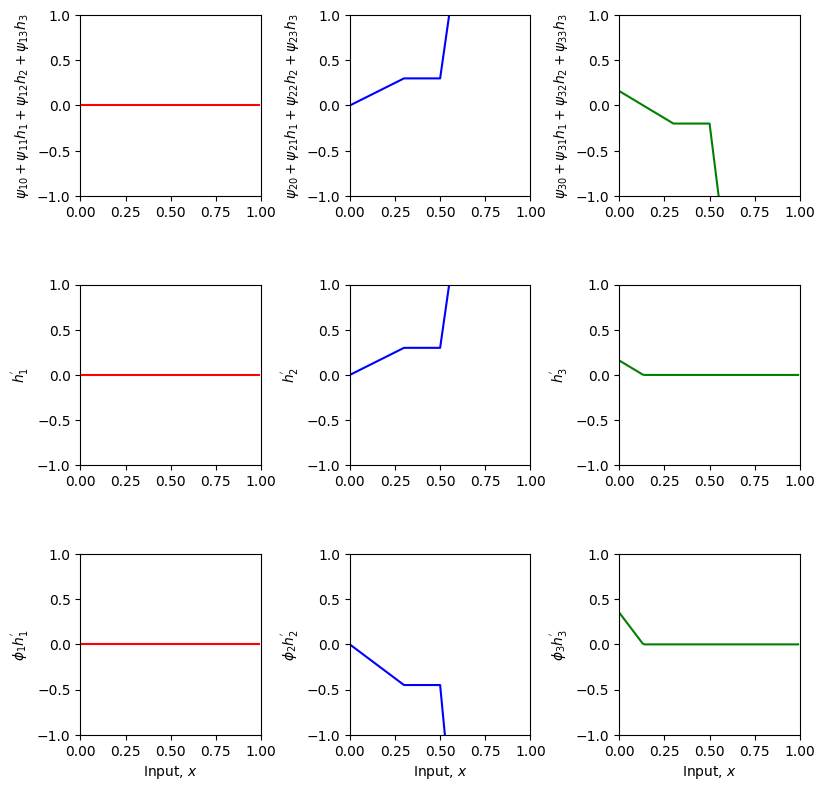

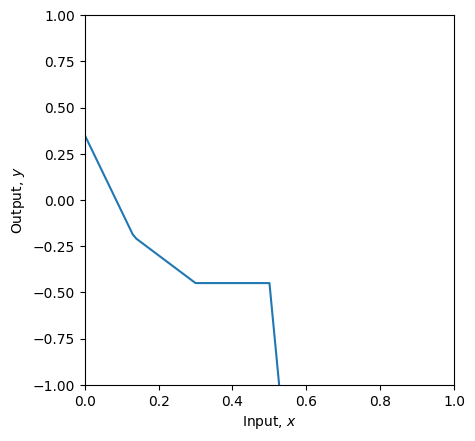

In [10]:
# Define parameters (note first dimension of theta and phi is padded to make indices match
# notation in book)
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)

To do:  To test your understanding of this, consider:

1.   What would happen if we increase $\psi_{1,0}$?
2.   What would happen if we multiplied $\psi_{2,0}, \psi_{2,1}, \psi_{2,2},  \psi_{2,3}$ by -1?
3.  What would happen if set $\phi_{3}$ to -1?

You can rerun the code to see if you were correct.



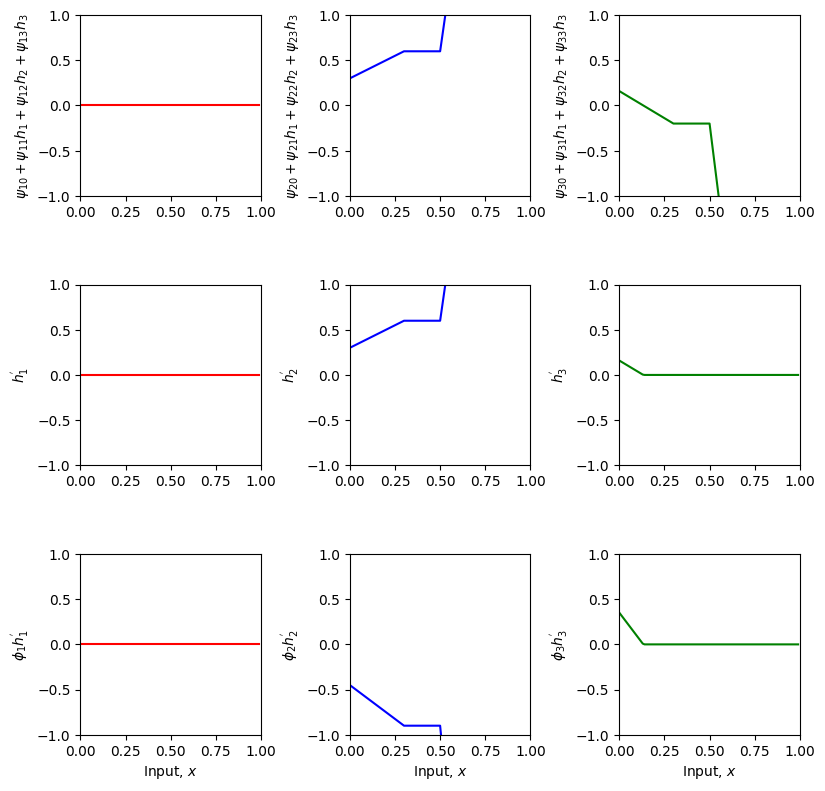

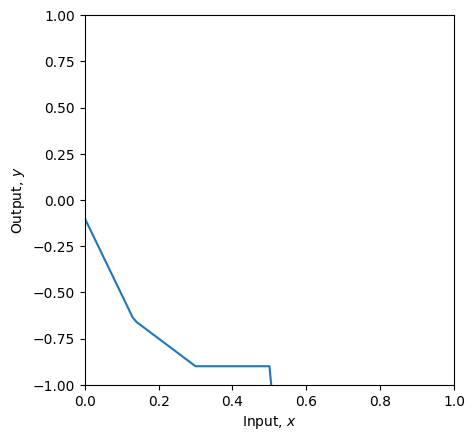

In [18]:
# Define parameters (note first dimension of theta and phi is padded to make indices match
# notation in book)
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65

# What would happen if we increase  𝜓1,0 ?
psi[1,0] = 0.6;

psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)

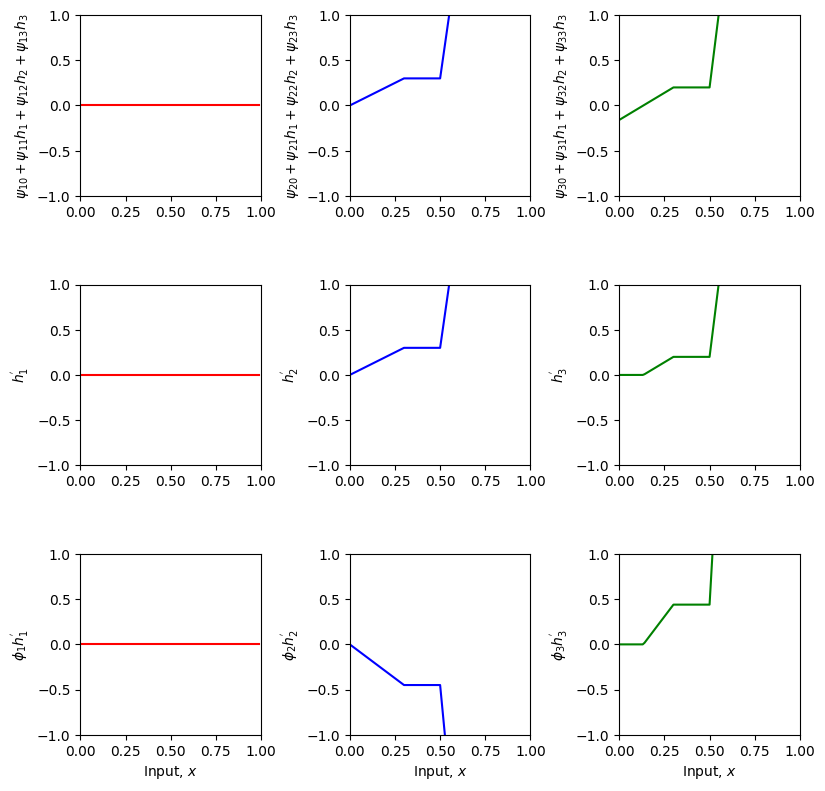

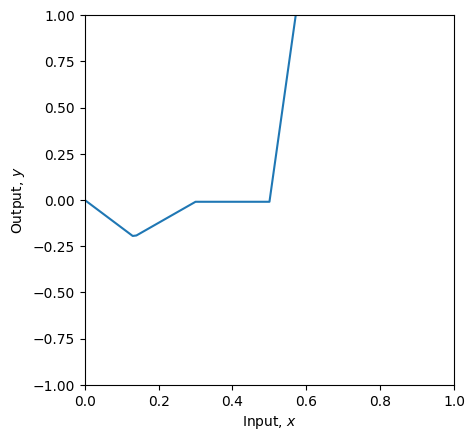

In [19]:
# Define parameters (note first dimension of theta and phi is padded to make indices match
# notation in book)
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0

# What would happen if we multiplied  𝜓2,0,𝜓2,1,𝜓2,2,𝜓2,3  by -1?
psi[2,0] = -0.2 * -1.0;  psi[2,1] = 2.0 * -1.0; psi[2,2] = 1.2 * -1.0; psi[2,3]=-8.0 * -1.0

psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)

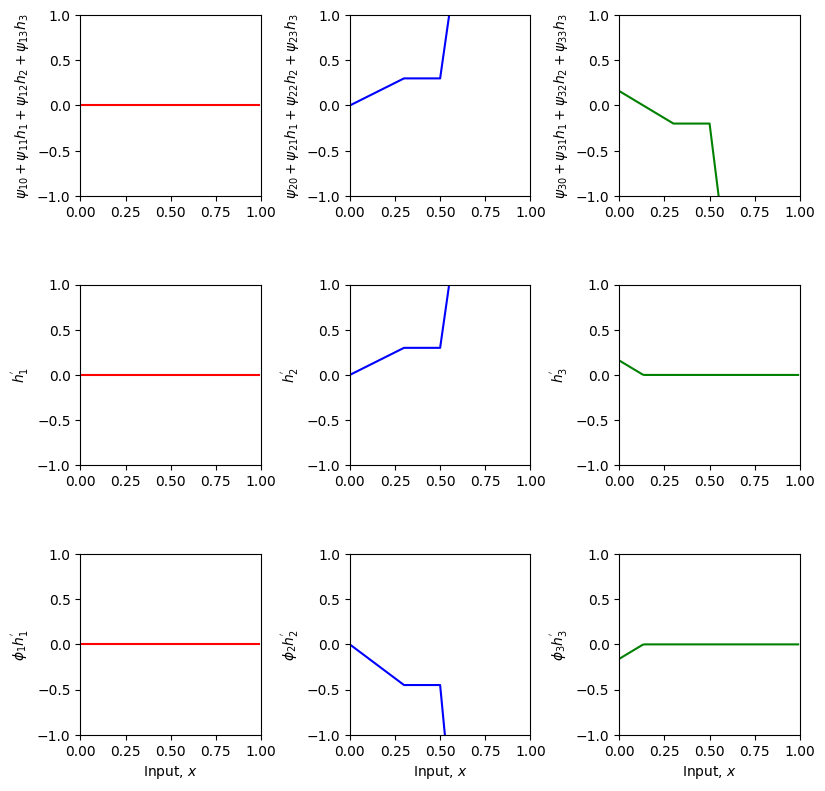

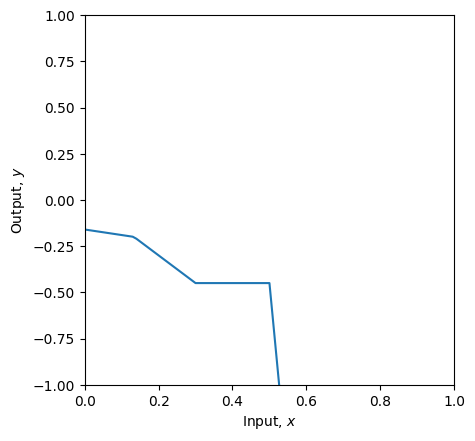

In [21]:
# Define parameters (note first dimension of theta and phi is padded to make indices match
# notation in book)
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5;

# What would happen if set  𝜙3  to -1?
phi [3] = -1

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)